In [1]:
import pandas as pd
from rich.console import Console
from rich.markdown import Markdown

In [2]:
console = Console()

In [4]:
# for CSV File
try:
    df_results = pd.read_csv("29_storing_experiment_data/experiment_results.csv")
    print(df_results.head())
    console.print(Markdown(f"\nLoaded: {len(df_results)}"))
except FileNotFoundError:
    print("experiment_results.csv not found. Run batch_tester.py first.")
    df_results = pd.DataFrame()

             timestamp prompt_variant_name  \
0  2025-07-25 14:15:39    variant_A_formal   
1  2025-07-25 14:15:40    variant_A_formal   
2  2025-07-25 14:15:41    variant_A_formal   
3  2025-07-25 14:15:42    variant_A_formal   
4  2025-07-25 14:15:43    variant_A_formal   

                                     test_case_input  temperature  \
0  The quick brown fox jumps over the lazy dog. T...          0.2   
1  The quick brown fox jumps over the lazy dog. T...          0.5   
2  The quick brown fox jumps over the lazy dog. T...          0.8   
3  The quick brown fox jumps over the lazy dog. T...          1.2   
4  Large language models are transforming various...          0.2   

     model_name                                       llm_response  \
0  gpt-4.1-nano  The sentence "The quick brown fox jumps over t...   
1  gpt-4.1-nano  The sentence "The quick brown fox jumps over t...   
2  gpt-4.1-nano  The sentence "The quick brown fox jumps over t...   
3  gpt-4.1-nano  The sentenc

Loaded: 64

In [ ]:
# for JSON File
try:
    df_results = pd.read_json("25_cli_batch_test_data_result/experiment_result.jsonl")

    print(df_results.head())
    console.print(Markdown(f"\nLoaded: {len(df_results)}"))
except FileNotFoundError:
    print("experiment_result.json not found. Run batch_tester.py first.")
    df_results = pd.DataFrame()

Loaded: 64

In [7]:
if not df_results.empty:
    avg_kpis = df_results.groupby('prompt_variant_name').agg( 
        avg_latency=('latency_seconds', 'mean'), 
        median_latency=('latency_seconds', 'median'), 
        avg_total_tokens=('total_tokens', 'mean'), 
        std_total_tokens=('total_tokens', 'std'), 
        count_runs=('prompt_variant_name', 'count') # Count of runs per variant 
    ).sort_values(by='avg_latency')
    print("\n--- Average KPIs per Prompt Variant ---") 
    print(avg_kpis) 
else: 
    print("DataFrame is empty, skipping statistics.") 



--- Average KPIs per Prompt Variant ---
                     avg_latency  median_latency  avg_total_tokens  \
prompt_variant_name                                                  
variant_B_bullet        0.889419         0.84860           82.4375   
variant_D_translate     0.959256         0.93685           78.1250   
variant_A_formal        1.065450         0.85110           72.6875   
variant_C_casual        1.118169         1.09825          111.8125   

                     std_total_tokens  count_runs  
prompt_variant_name                                
variant_B_bullet             2.756054          16  
variant_D_translate          3.180671          16  
variant_A_formal             2.088660          16  
variant_C_casual             7.222361          16  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


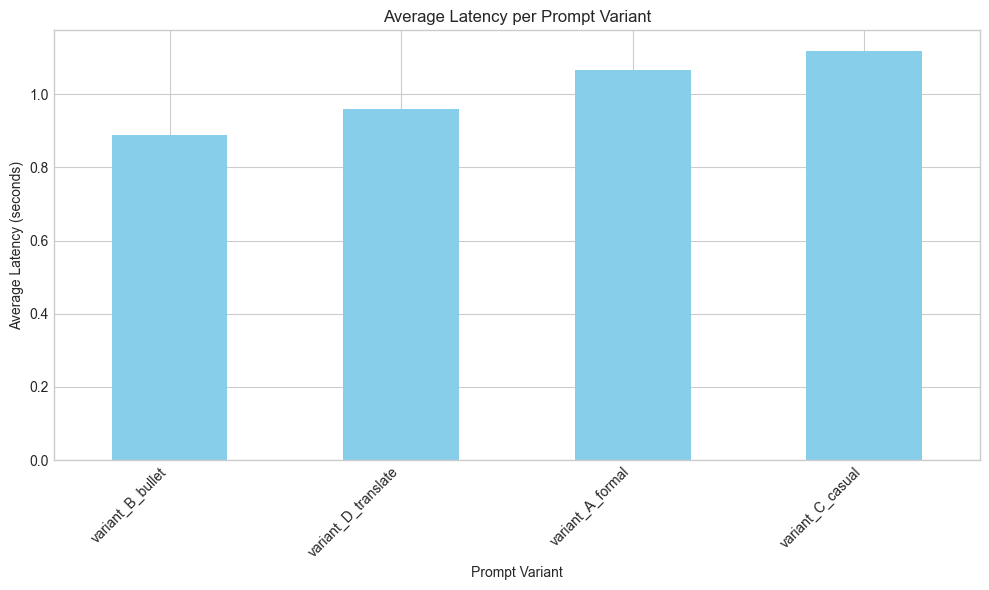

C:\Users\umarf\AppData\Local\Temp\ipykernel_6840\3604291607.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prompt_variant_name', y='latency_seconds', data=df_results, palette="pastel")


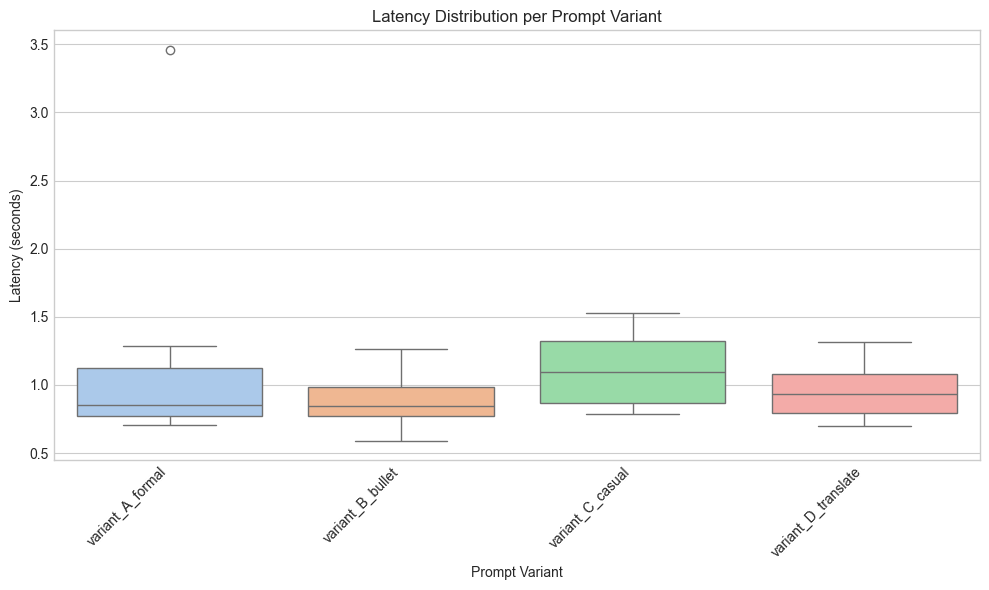

In [11]:
if not df_results.empty and not avg_kpis.empty: 
    plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style 
 
    # Bar chart for average latency 
    avg_kpis['avg_latency'].plot(kind='bar', figsize=(10, 6), color='skyblue') 
    plt.title('Average Latency per Prompt Variant') 
    plt.ylabel('Average Latency (seconds)') 
    plt.xlabel('Prompt Variant') 
    plt.xticks(rotation=45, ha="right") 
    plt.tight_layout() # Adjust layout to prevent labels from overlapping 
    plt.show() 
 
    # Box plot for latency distribution per variant 
    if 'latency_seconds' in df_results.columns: 
        plt.figure(figsize=(10, 6)) 
        sns.boxplot(x='prompt_variant_name', y='latency_seconds', data=df_results, palette="pastel") 
        plt.title('Latency Distribution per Prompt Variant') 
        plt.ylabel('Latency (seconds)') 
        plt.xlabel('Prompt Variant') 
        plt.xticks(rotation=45, ha="right") 
        plt.tight_layout() 
        plt.show() 
    else: 
        print("Column 'latency_seconds' not found for boxplot.")